In [ ]:
#fibonacci Series with bruteforce recursion O(2^n)
def fibo(n): 
    if n <= 1:
        return 1
    return fibo(n-1) + fibo(n-2)
fibo(10)

89

In [ ]:
#fibonacci Series with recursion + memoization (Top down approach)
def fibo(n,cache):
    if n in cache:
        return cache[n]
    
    if n <= 1:
        return 1
    cache[n] = fibo(n-1,cache) + fibo(n-2,cache)
    return cache[n]

fibo(10,{})


89

In [15]:
#fibonacci Series with recursion + memoization (Bottom Up approach)
def fibo(n):
    
    tbl = [0,1]
    i = 1
    while i <= n:
        i += 1
        tmp = tbl[1]
        tbl[1] = tbl[0] + tbl[1]
        tbl[0] = tmp
    return tbl[1]

fibo(10)


89

Climbing Stairs

You are given an integer n representing the number of steps to reach the top of a staircase. You can climb with either 1 or 2 steps at a time.

Return the number of distinct ways to climb to the top of the staircase.

Example 1:

Input: n = 2

Output: 2
Explanation:

1 + 1 = 2
2 = 2
Example 2:

Input: n = 3

Output: 3
Explanation:

1 + 1 + 1 = 3
1 + 2 = 3
2 + 1 = 3
Constraints:

1 <= n <= 30


In [2]:
#tabulation or bottom up approach
class Solution:
    def climbStairs(self, n: int) -> int:
        
        if n < 3:
            return n

        dp = [1,2]
        i = 2
        while i < n:
            tmp = dp[1]
            dp[1] = dp[0] + dp[1]
            dp[0] = tmp
            i+=1
        
        return dp[1]

In [ ]:
#top down approach with memoization

class Solution:
    def climbStairs(self, n: int) -> int:
        cache = {0:0,1:1,2:2}
        def dp(n):
            if n in cache:
                return cache[n]

            cache[n] = dp(n-1) + dp(n-2)
            return cache[n]
        return dp(n)
    

You are given an integer array nums where nums[i] represents the amount of money the ith house has. The houses are arranged in a straight line, i.e. the ith house is the neighbor of the (i-1)th and (i+1)th house.

You are planning to rob money from the houses, but you cannot rob two adjacent houses because the security system will automatically alert the police if two adjacent houses were both broken into.

Return the maximum amount of money you can rob without alerting the police.

Example 1:

Input: nums = [1,1,3,3]

Output: 4
Explanation: nums[0] + nums[2] = 1 + 3 = 4.

Example 2:

Input: nums = [2,9,8,3,6]

Output: 16
Explanation: nums[0] + nums[2] + nums[4] = 2 + 8 + 6 = 16.

Constraints:

1 <= nums.length <= 100
0 <= nums[i] <= 100

In [6]:
class Solution:
    def rob(self, nums):
        rob1, rob2 = 0, 0

        for num in nums:
            temp = max(num + rob1, rob2)
            rob1 = rob2
            rob2 = temp
        return rob2
    
Solution().rob([2,9,8,3,6])

16

Input: nums = [2,9,8,3,6]

Output: 16


62. Unique Paths
Solved
Medium
Topics
premium lock icon
Companies
There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 109.

 

Example 1:
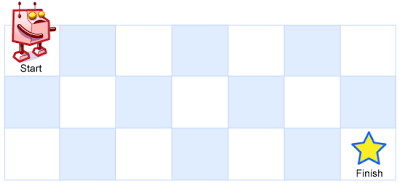

Input: m = 3, n = 7
Output: 28
Example 2:

Input: m = 3, n = 2
Output: 3
Explanation: From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
1. Right -> Down -> Down
2. Down -> Down -> Right
3. Down -> Right -> Down
 

Constraints:

1 <= m, n <= 100

In [ ]:
#Memoization or Top down Approach   TC O(m*n)  SC O(m*n)
class Solution(object):
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        
        cache = [[0]*n for i in range(m)]

        def dfs(r,c,m,n,cache):
            
            if r >= m or c >= n:
                return 0
            if r == m-1 and c == n-1:
                return 1
            if cache[r][c] > 0:
                return cache[r][c]

            cache[r][c] = dfs(r+1,c,m,n,cache) + dfs(r,c+1,m,n,cache)

            return cache[r][c]
        
        return dfs(0,0,m,n,cache)

In [ ]:
# Tabulation or Bottom up Approach TC O(m*n)  SC O(1)
class Solution(object): 
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """

        prevrow = [0] * n
        
        for r in range(m-1,-1,-1):
            curRow = [0] * n
            curRow[n-1] = 1
            for c in range(n-2,-1,-1):
                curRow[c] = curRow[c+1] + prevrow[c]
            prevrow = curRow
        return prevrow[0]

63. Unique Paths II

You are given an m x n integer array grid. There is a robot initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

An obstacle and space are marked as 1 or 0 respectively in grid. A path that the robot takes cannot include any square that is an obstacle.

Return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The testcases are generated so that the answer will be less than or equal to 2 * 109.

 

Example 1:

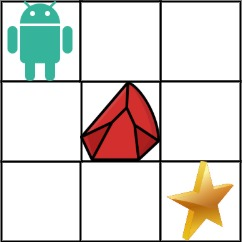

Input: obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
Output: 2
Explanation: There is one obstacle in the middle of the 3x3 grid above.
There are two ways to reach the bottom-right corner:
1. Right -> Right -> Down -> Down
2. Down -> Down -> Right -> Right
Example 2:

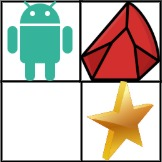

Input: obstacleGrid = [[0,1],[0,0]]
Output: 1
 

Constraints:

m == obstacleGrid.length
n == obstacleGrid[i].length
1 <= m, n <= 100
obstacleGrid[i][j] is 0 or 1.

In [2]:
class Solution(object):
    def uniquePathsWithObstacles(self, obstacleGrid):
        """
        :type obstacleGrid: List[List[int]]
        :rtype: int
        """
        if obstacleGrid[0][0] or obstacleGrid[-1][-1]:
            return 0
        
        m,n = len(obstacleGrid),len(obstacleGrid[0])

        def dfs(r,c,m,n,cache):

            if r >= m or c >= n or obstacleGrid[r][c]:
                return 0
            if r == m-1 and c == n-1:
                return 1
            if cache[r][c]:
                return cache[r][c]

            cache[r][c] = dfs(r+1,c,m,n,cache) + dfs(r,c+1,m,n,cache)

            return cache[r][c]
        
        return dfs(0,0,m,n,[[0]*(n) for i in range(m)])